In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


#### Question 1

In [2]:
# loading dataset

df = pd.read_csv("Social_Network_Ads.csv")
print(df.head())


    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [3]:
# define x and y
X = df[['Age', 'EstimatedSalary']].values
y = df['Purchased'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale features for better KNN performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [4]:
# initialize and train KNN classifier
knn = KNeighborsClassifier(n_neighbors=4, p=2)
knn.fit(X_train, y_train)

# predictions on the test set
y_pred = knn.predict(X_test)


In [5]:
# computing metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
misclassification_error = 1 - accuracy

print(f"Misclassification Error: {misclassification_error:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Misclassification Error: 0.0750
Accuracy: 0.9250
Precision: 0.8929
Recall: 0.8929
F1 Score: 0.8929


With K=4 and p=2, the classifier achieves a high accuracy rate of 92.5% which suggests that the model performs well. The precision and recall scores are also balanced (both 89.29%), meaning that the model is good at identifying both positive and negative cases. The misclassification error is also low (7.5%), which confirms that the model is making very few mistakes. Overall, these results indicate that the model provides strong classification performance with a good balance of precision and recall. 

#### Question 2

In [6]:
# k values from 1 to 15
k_values = range(1, 16)  
misclassification_errors_p1 = []  # store misclassification errors for p = 1 (manhattan)
misclassification_errors_p2 = []  # store misclassification errors for p = 2 (euclidean)

In [7]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, p=1)  # p=1 for manhattan distance
    cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring="accuracy")
    misclassification_errors_p1.append(1 - np.mean(cv_scores))  # error = 1 - accuracy

#### Question 3

In [8]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, p=2)  # p=2 for euclidean distance
    cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring="accuracy")
    misclassification_errors_p2.append(1 - np.mean(cv_scores))  # error = 1 - accuracy


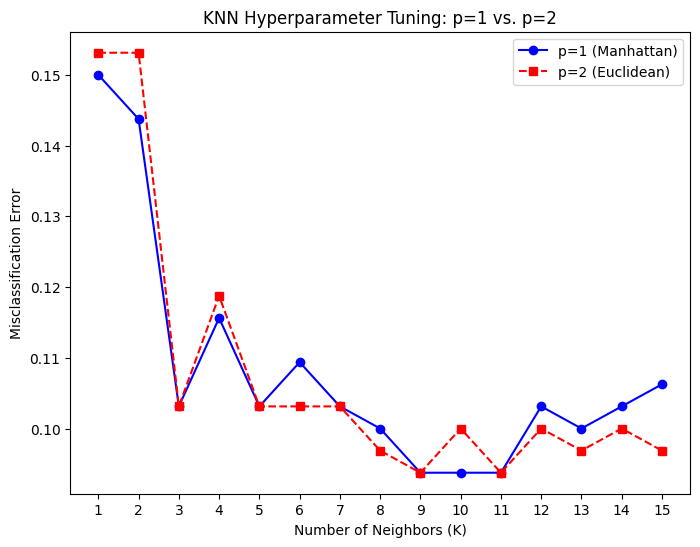

In [9]:
plt.figure(figsize=(8, 6))

# plot error for p = 1
plt.plot(k_values, misclassification_errors_p1, marker='o', linestyle='-', label="p=1 (Manhattan)", color='b')

# plot error for p = 2
plt.plot(k_values, misclassification_errors_p2, marker='s', linestyle='--', label="p=2 (Euclidean)", color='r')

plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Misclassification Error")
plt.title("KNN Hyperparameter Tuning: p=1 vs. p=2")
plt.xticks(k_values)
plt.legend()
plt.show()


In [10]:
# find best K for p = 1 (Manhattan)
best_k_p1 = k_values[np.argmin(misclassification_errors_p1)]
best_error_p1 = min(misclassification_errors_p1)

# find best K for p = 2 (Euclidean)
best_k_p2 = k_values[np.argmin(misclassification_errors_p2)]
best_error_p2 = min(misclassification_errors_p2)

print(f"Best K for Manhattan distance (p=1): {best_k_p1}, with Misclassification Error: {best_error_p1:.4f}")
print(f"Best K for Euclidean distance (p=2): {best_k_p2}, with Misclassification Error: {best_error_p2:.4f}")

Best K for Manhattan distance (p=1): 9, with Misclassification Error: 0.0938
Best K for Euclidean distance (p=2): 9, with Misclassification Error: 0.0938


In [11]:
# Find the best overall classifier (smallest misclassification error)
if best_error_p1 < best_error_p2:
    best_p, best_k, best_error = 1, best_k_p1, best_error_p1
else:
    best_p, best_k, best_error = 2, best_k_p2, best_error_p2

print(f"Best overall classifier: p={best_p}, K={best_k}, with Misclassification Error: {best_error:.4f}")

Best overall classifier: p=2, K=9, with Misclassification Error: 0.0938


#### Question 4

The best value of K with Euclidean distance is 9, which is the same as the best value for K with Manhattan distance. For this dataset, Manhatten (p=1) and Euclidean (p=2) distances perform similarly in our KNN classification model. Both result in nearly identical misclassification errors, which suggests that the dataset's structure does not signficantly benefit from one distance metric over the other. Since Euclidean distance simply corresponds to the shortest straight-line distance between two points, the best classifier is with p = 2 (Euclidean) and K=9, but we can obtain the same results using p=1 as well. This indicates that either distance metric can be used interchangeably for this dataset. 